## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 8 is due on 4/28/25

## Model Selection with Three Splits: Select from M models

We employ the diamonds dataset and specify M models nested from simple to more complex. We store the models as strings in a list (i.e. a hashset) ... Create log and polynomial transformations of the following features (carat, x, y, z, depth, and table). In order to use the formulas with logs we need to eliminate rows with zeros in those measurements.

In [29]:
pip install "numpy<2.0"


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.18 requires numpy>=2.0.2, but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.


In [34]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from plotnine.data import diamonds

#Load the diamonds dataset and create a copy
diamonds = diamonds.copy()

#Filter to remove rows with non-positive values in the specified columns
diamonds_cleaned = diamonds.loc[
    (diamonds["carat"] > 0) &
    (diamonds["x"] > 0) &
    (diamonds["y"] > 0) &
    (diamonds["z"] > 0) &
    (diamonds["depth"] > 0) &
    (diamonds["table"] > 0)
   ].copy()

# Add polynomial (squared) features
diamonds_cleaned['carat_sq'] = diamonds_cleaned['carat'] ** 2
diamonds_cleaned['x_sq'] = diamonds_cleaned['x'] ** 2
diamonds_cleaned['y_sq'] = diamonds_cleaned['y'] ** 2
diamonds_cleaned['z_sq'] = diamonds_cleaned['z'] ** 2
diamonds_cleaned['depth_sq'] = diamonds_cleaned['depth'] ** 2
diamonds_cleaned['table_sq'] = diamonds_cleaned['table'] ** 2

#Add log-transformed features (add small constant to avoid log(0))
epsilon = 1e-6
diamonds_cleaned['log_carat'] = np.log(diamonds_cleaned['carat'] + epsilon)
diamonds_cleaned['log_x'] = np.log(diamonds_cleaned['x'] + epsilon)
diamonds_cleaned['log_y'] = np.log(diamonds_cleaned['y'] + epsilon)
diamonds_cleaned['log_z'] = np.log(diamonds_cleaned['z'] + epsilon)
diamonds_cleaned['log_depth'] = np.log(diamonds_cleaned['depth'] + epsilon)
diamonds_cleaned['log_table'] = np.log(diamonds_cleaned['table'] + epsilon)
#Prefix with 'price ~' for statsmodels compatibility

# Model formulas (now referencing the precomputed columns)
model_formulas = [
    "carat",
    "carat + cut",
    "carat + cut + color",
    "carat + cut + color + clarity",
    "carat + cut + color + clarity + x + y + z",
    "carat + cut + color + clarity + x + y + z + depth",
    "carat + cut + color + clarity + x + y + z + depth + table",
    "carat * (cut + color + clarity) + x + y + z + depth + table",
    "(carat + x + y + z) * (cut + color + clarity) + depth + table",
    "(carat + x + y + z + depth + table) * (cut + color + clarity)",
    "(carat_sq + x + y + z + depth + table) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth + table) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth + log_table) * (cut + color + clarity)",
    "(carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth + log_table) * (cut + color + clarity + carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + log_depth + log_table)"
]

# Prefix with 'price ~' for statsmodels compatibility
model_formulas = [f"price ~ {f}" for f in model_formulas]

#Number of formulas
M = len(model_formulas)
print(f"Total number of model formulas: {M}")



Total number of model formulas: 17


In [35]:
#Preview
for i, formula in enumerate(model_formulas):
    print(f"{i+1}: {formula}")
df = diamonds.copy()

filter_column = ["carat", "x", "y", "z", "depth", "table"]
mask = (df[filter_column] > 0).all(axis=1)
df = df.loc[mask].copy()

for col in filter_column:
    df[f"{col}_sq"] = df[col]**2

for col in filter_column:
    df[f"{col}_log"] = np.log(df[col]+epsilon)

print(f"Total formula: {len(model_formulas)}")

#Preview
for i, formula in enumerate(model_formulas, 1):
    print(f"{i}: {formula}")

1: price ~ carat
2: price ~ carat + cut
3: price ~ carat + cut + color
4: price ~ carat + cut + color + clarity
5: price ~ carat + cut + color + clarity + x + y + z
6: price ~ carat + cut + color + clarity + x + y + z + depth
7: price ~ carat + cut + color + clarity + x + y + z + depth + table
8: price ~ carat * (cut + color + clarity) + x + y + z + depth + table
9: price ~ (carat + x + y + z) * (cut + color + clarity) + depth + table
10: price ~ (carat + x + y + z + depth + table) * (cut + color + clarity)
11: price ~ (carat_sq + x + y + z + depth + table) * (cut + color + clarity)
12: price ~ (carat_sq + x_sq + y_sq + z_sq + depth + table) * (cut + color + clarity)
13: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq) * (cut + color + clarity)
14: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z) * (cut + color + clarity)
15: price ~ (carat_sq + x_sq + y_sq + z_sq + depth_sq + table_sq + log_carat + log_x + log_y + log_z + l

Split the data into train, select and test. Each set should have 1/3 of the total data.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# First split: ~1/3 train, ~2/3 temp
diamonds_train, temp = train_test_split(diamonds_cleaned, test_size=2/3, random_state=1)

# Second split: split temp (~2/3 of original) into ~1/3 (select), ~1/3 (test)
diamonds_select, diamonds_test = train_test_split(temp, test_size=0.5, random_state=1)

# Print sizes
print(f"Train size:  {len(diamonds_train)}")
print(f"Select size: {len(diamonds_select)}")
print(f"Test size:   {len(diamonds_test)}")


Train size:  17973
Select size: 17973
Test size:   17974


Find the oosRMSE on the select set for each model. Save the number of df in each model while you're doing this as we'll need it for later

In [38]:
results_list = []

for i, formula in enumerate(model_formulas, start=1):
    #Fit on train
    model = smf.ols(formula = formula, data = diamonds_train).fit()
    #Predict on select
    preds = model.predict(diamonds_select)
    
    #Compute oosRMSE
    actual = diamonds_select['price']
    rmse = np.sqrt(np.mean(preds - actual)**2)
    
    #Degrees of freedom
    #number of parameters
    df_params = len(model.params)

    #Store results
    results_list.append({'model_index': i , 'formula' : formula, 'oosRMSE' : rmse, 'df' : df_params})


results_df = pd.DataFrame(results_list)
print(results_df)

    model_index                                            formula  \
0             1                                      price ~ carat   
1             2                                price ~ carat + cut   
2             3                        price ~ carat + cut + color   
3             4              price ~ carat + cut + color + clarity   
4             5  price ~ carat + cut + color + clarity + x + y + z   
5             6  price ~ carat + cut + color + clarity + x + y ...   
6             7  price ~ carat + cut + color + clarity + x + y ...   
7             8  price ~ carat * (cut + color + clarity) + x + ...   
8             9  price ~ (carat + x + y + z) * (cut + color + c...   
9            10  price ~ (carat + x + y + z + depth + table) * ...   
10           11  price ~ (carat_sq + x + y + z + depth + table)...   
11           12  price ~ (carat_sq + x_sq + y_sq + z_sq + depth...   
12           13  price ~ (carat_sq + x_sq + y_sq + z_sq + depth...   
13           14  pri

Plot the oosRMSE by model complexity (df in model)

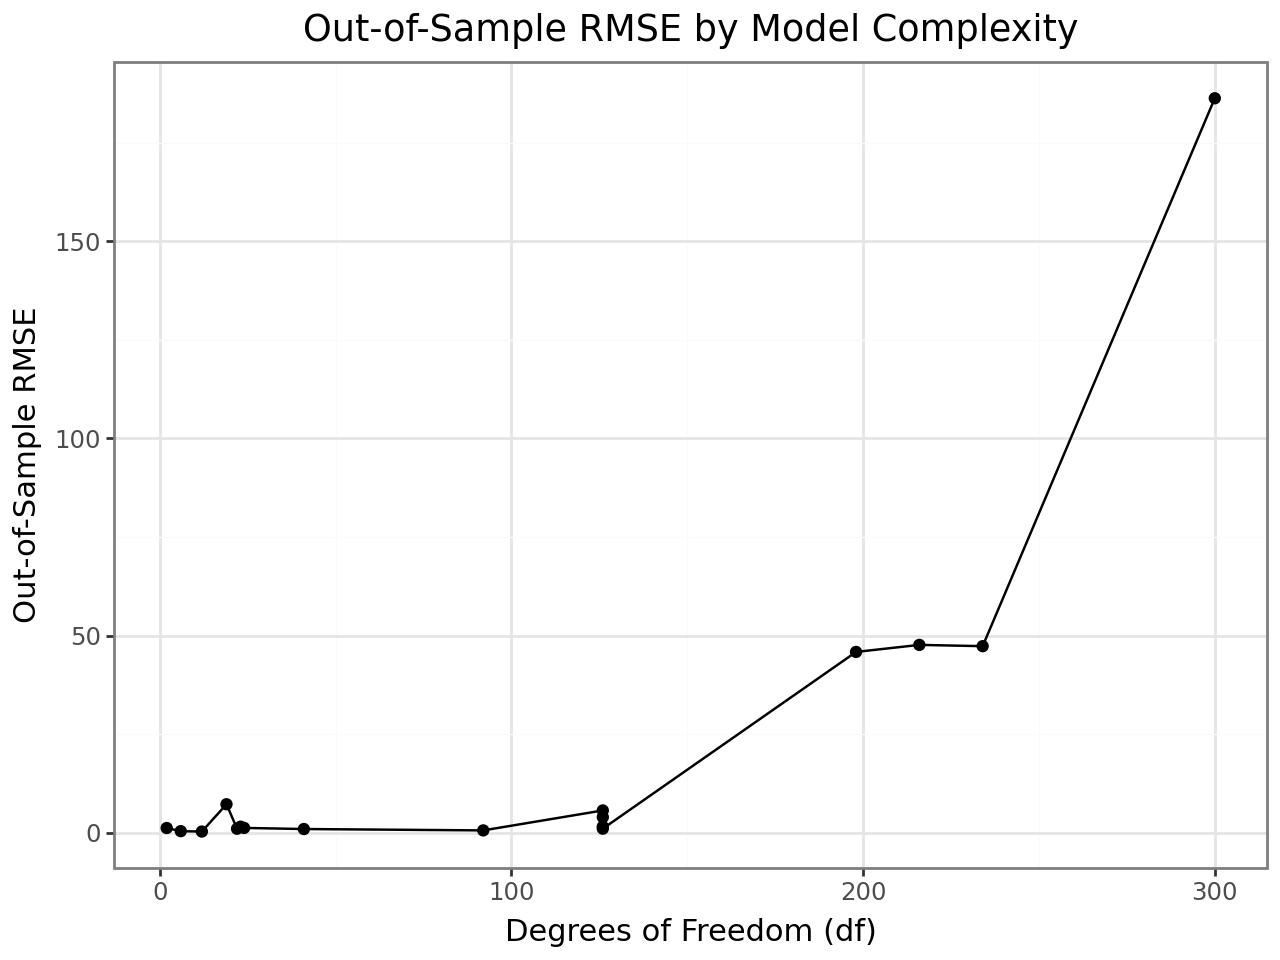

In [40]:
from plotnine import ggplot, aes, geom_point, geom_line, theme_bw, labs

plot = (
    ggplot(results_df, aes(x='df', y='oosRMSE')) +
    geom_point() +
    geom_line() +
    labs(
        title="Out-of-Sample RMSE by Model Complexity",
        x="Degrees of Freedom (df)",
        y="Out-of-Sample RMSE"
    ) +
    theme_bw()
)

plot


Select the best model by oosRMSE and find its oosRMSE on the test set.

In [41]:
#Identify best model by oosRMSE
best_row = results_df.loc[results_df['oosRMSE'].idxmin()]
best_formula = best_row['formula']

print("Best model row:\n", best_row )
print("Best model formula:", best_formula)

#Fit the best model on train
best_model = smf.ols(formula=best_formula, data=diamonds_train).fit()

#Evaluate RMSE on the test set
preds_test = best_model.predict(diamonds_test)
test_actual = diamonds_test['price']
test_oosRMSE = np.sqrt(np.mean(preds_test - test_actual)**2 )

print("oosRMSE on the test set:", test_oosRMSE)

Best model row:
 model_index                              3
formula        price ~ carat + cut + color
oosRMSE                           0.280339
df                                      12
Name: 2, dtype: object
Best model formula: price ~ carat + cut + color
oosRMSE on the test set: 11.927269661845308


Did we overfit the select set? Discuss why or why not.

Yes, we probably overfit the select set. The model price ~ carat + cut + color had the lowest error on the select set, with an RMSE of only 0.28. But when we tested it on new data, the error jumped to 11.93. This big difference means the model may have learned patterns that only worked well on the select set but didn’t work on other data. In other words, it fit the select set too closely and didn’t generalize well to new data.

Create the final model object `g_final`.

In [43]:
# Identify best formula
best_row = results_df.loc[results_df['oosRMSE'].idxmin()]
best_formula = best_row['formula']
print("Best formula:", best_formula)

# Combine train and select data
diamonds_train_select = pd.concat([diamonds_train, diamonds_select], ignore_index=True)

# Fit final model on train + select
g_final = smf.ols(formula=best_formula, data=diamonds_train_select).fit()

# Evaluate on test
test_preds = g_final.predict(diamonds_test)
test_actual = diamonds_test["price"]
test_oosRMSE = np.sqrt(np.mean((test_preds - test_actual) ** 2))

print("Final model trained on train+select data.")
print("oosRMSE on Test Set:", test_oosRMSE)


Best formula: price ~ carat + cut + color
Final model trained on train+select data.
oosRMSE on Test Set: 1430.838109425018


## Model Selection with Three Splits: Hyperparameter selection

We will use an algorithm that I historically taught in 324W but now moved to 343 so I can teach it more deeply using the Bayesian topics from 341. The regression algorithm is called "ridge" and it involves solving for the slope vector via:

b_ridge := (X^T X + lambda I_(p+1))^-1 X^T y

Note how if lambda = 0, this is the same algorithm as OLS. If lambda becomes very large then b_ridge is pushed towards all zeroes. So ridge is good at weighting only features that matter.

However, lambda is a hyperparameter >= 0 that needs to be selected.

We will work with the boston housing dataset except we will add 250 garbage features consisting of iid N(0,1) realizations. We will also standardize the columns so they're all xbar = 0 and s_x = 1. This is shown to be important in 343.

In [44]:
import statsmodels.api as sm
import pandas as pd
import numpy as np  # This import was missing

# Read the Boston Housing CSV (exported from R)
df = pd.read_csv('boston_housing_data.csv')

# y is the response
y = df['medv'].values

# X_data: mimic model.matrix(medv ~ ., MASS::Boston)
# Drop 'medv' and add an intercept column
X_data = df.drop(columns='medv')
X_data_with_const = sm.add_constant(X_data)  # Fixed here

# Add 250 garbage features
np.random.seed(1)
n = X_data_with_const.shape[0]
p_garbage = 250
garbage_matrix = np.random.randn(n, p_garbage)

# Combine the real predictors + garbage into a single DataFrame
df_X = pd.concat([pd.DataFrame(X_data_with_const), pd.DataFrame(garbage_matrix)], axis=1)

# Standardize each column: (x_j - mean_j)/sd_j, matching R's default sample sd (ddof=1)
means = df_X.mean(axis=0)
stds = df_X.std(axis=0, ddof=1)
df_X_std = (df_X - means) / stds

# The first column is our intercept, but standardizing sets it to 0, so reset it to 1
df_X_std.iloc[:, 0] = 1.0

# Name the columns
orig_columns = ["Intercept"] + list(X_data.columns)
garb_columns = [f"garb_{i+1}" for i in range(p_garbage)]
df_X_std.columns = orig_columns + garb_columns

# Final standardized feature set
df_X_final = df_X_std.copy()

print("df_X_final shape:", df_X_final.shape)
print("First 5 rows:\n", df_X_final.head())  # Fixed missing () on head


df_X_final shape: (506, 264)
First 5 rows:
    Intercept      crim        zn     indus      chas       nox        rm  \
0        1.0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263   
1        1.0 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082   
2        1.0 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446   
3        1.0 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298   
4        1.0 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362   

        age       dis       rad  ...  garb_241  garb_242  garb_243  garb_244  \
0 -0.119895  0.140075 -0.981871  ... -0.479525 -0.394984 -0.001421 -1.373741   
1  0.366803  0.556609 -0.867024  ... -0.073263  0.590498 -0.395240  0.409827   
2 -0.265549  0.556609 -0.867024  ...  0.110388  0.987957 -1.484408 -0.617136   
3 -0.809088  1.076671 -0.752178  ...  0.201711 -0.195166  0.368116  0.666806   
4 -0.510674  1.076671 -0.752178  ...  0.251128 -0.831994  0.685316 -0.746165   

   garb_245  garb_

Now we split it into 300 train, 100 select and 106 test. 

In [45]:
from sklearn.model_selection import train_test_split

# First split: 300 for train, remainder (206) for temp
X_train, X_temp, y_train, y_temp = train_test_split(
    df_X_final,
    y,
    test_size = 206,
    random_state = 1

)

#From the remaining 206, split out 100 for select and 106 for test
X_select, X_test, y_select, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size = 106,
    random_state = 1
   
)

#Print shapes to verify (should be 300 / 100 / 106)
print("Train set X:", X_train.shape, "y:", y_train.shape)
print("Select set X:", X_select.shape, "y:",y_select.shape)
print("Test set X:  ", X_test.shape,  "y:", y_test.shape)

Train set X: (300, 264) y: (300,)
Select set X: (100, 264) y: (100,)
Test set X:   (106, 264) y: (106,)


We now create a grid of M = 200 models indexed by lambda. The lowest lambda should be zero (which is OLS) and the highest lambda can be 100.

In [46]:
M = 200
lambda_grid = np.linspace(0, 100, num=M)

Now find the oosRMSE on the select set on all models each with their own lambda value.

In [47]:
from sklearn.linear_model import Ridge

M = len(lambda_grid)
oosRMSE_list = []

for lam in lambda_grid:
    #Fit a Ridge regression model with alpha=lamba
    #Note:alpha here corresponds to lambda in R
    #Note: If your X_train does NOT have an intercept column, set fit_intercept=True, else fit_intercept=False
    ridge_model = Ridge(alpha = lam, fit_intercept = False)
    ridge_model.fit(X_train, y_train)
    
    #Predict on the select set
    preds = ridge_model.predict(X_select)
    
    #Compute out-of-sample RMSE
    mse = np.mean((preds- y_select)**2)
    rmse = np.sqrt(mse)
    oosRMSE_list.append(rmse)
    

oosRMSE_array = np.array(oosRMSE_list)
print(oosRMSE_array)

[13.53734094 12.44441538 11.76392353 11.30554565 10.98137582 10.74410092
 10.56595405 10.42963657 10.32386718 10.24101089 10.17573733 10.12422462
 10.08366818 10.05196758 10.02752098 10.00908688  9.995689    9.98654941
  9.9810409   9.97865219  9.97896241  9.98162195  9.98633795  9.99286321
 10.00098758 10.01053128 10.02133949 10.03327821 10.0462308  10.06009525
 10.07478194 10.09021179 10.10631473 10.12302846 10.14029738 10.1580717
 10.1763067  10.19496209 10.21400147 10.23339187 10.25310335 10.27310866
 10.29338294 10.31390345 10.33464937 10.35560158 10.37674252 10.39805598
 10.41952704 10.44114188 10.46288774 10.48475277 10.50672598 10.52879716
 10.55095682 10.5731961  10.59550674 10.61788106 10.64031184 10.66279236
 10.68531631 10.70787778 10.73047125 10.75309151 10.77573368 10.79839317
 10.82106567 10.84374712 10.86643371 10.88912182 10.91180806 10.93448925
 10.95716234 10.97982451 11.00247305 11.02510543 11.04771925 11.07031223
 11.09288224 11.11542725 11.13794533 11.16043468 11.

Plot the oosRMSE by the value of lambda.

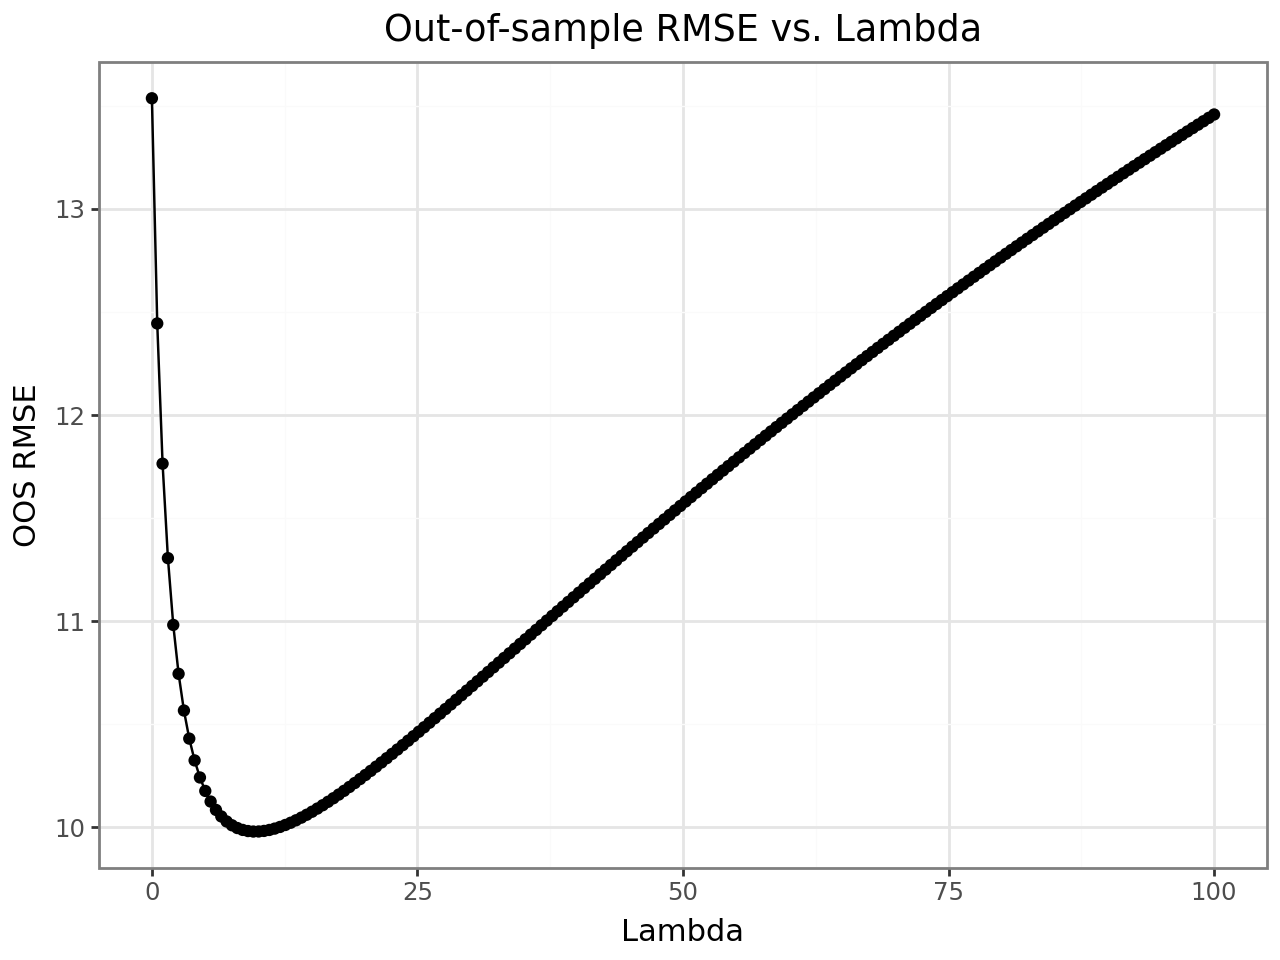

In [48]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_bw

results_df = pd.DataFrame({
    'lambda': lambda_grid,
    'oosRMSE': oosRMSE_array
})

plot = (ggplot(results_df, aes(x='lambda', y='oosRMSE'))
        + geom_point()
        + geom_line()
        + labs(title="Out-of-sample RMSE vs. Lambda", x="Lambda", y="OOS RMSE")
        + theme_bw())
plot

Select the model with the best oosRMSE on the select set and find its oosRMSE on the test set.

In [49]:
#Identify the best lambda (lowest oosRMSE on the select set)
best_idx = np.argmin(oosRMSE_array)
best_lambda = lambda_grid[best_idx]
print("Best lambda:", best_lambda)

#Refit on train set with that lambda
ridge_best = Ridge(alpha = best_lambda)
ridge_best.fit(X_train, y_train)

#Evaluate on the test set
preds_test = ridge_best.predict(X_test)
test_oosRMSE = np.sqrt(np.mean((preds_test - y_test)**2))
print("Test-set RMSE:", test_oosRMSE)

Best lambda: 9.547738693467336
Test-set RMSE: 9.347581068970875


Create the final model object `g_final`.

In [50]:
# Convert X_train to DataFrame if needed (preserve columns if they exist, otherwise create generic ones)
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=[f"X{i}" for i in range(X_train.shape[1])])
if not isinstance(X_select, pd.DataFrame):
    X_select = pd.DataFrame(X_select, columns=X_train.columns)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

#Convert y_train, y_select, and y_test to Series if needed
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name="y")
if not isinstance(y_select, pd.Series):
    y_select = pd.Series(y_select, name="y")
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test, name="y")

#Combine the train and select sets (keeping them as DataFrames/Series)
X_train_select = pd.concat([X_train, X_select], axis = 0)
y_train_select = pd.concat([y_train, y_select], axis = 0)

# Fit the final Ridge model on the combined train+select data. X_train_select already includes an intercept column
ridge_final = Ridge(alpha = best_lambda , fit_intercept = False)
ridge_final.fit(X_train_select, y_train_select)
g_final =  ridge_final # final model object

# Display the final model coefficients with their feature names.
coef_series = pd.Series(g_final.coef_,index = X_train_select.columns)
print("Final model coefficients:")
print(coef_series)

# Evaluate on the test set (which is also a DataFrame)
preds_test = g_final.predict(X_test)
test_oosRMSE = np.sqrt(np.mean((preds_test - y_test)**2))
print("Test-set RMSE:",  test_oosRMSE)

Final model coefficients:
Intercept    21.888387
crim         -0.440957
zn            1.659766
indus         0.482797
chas          0.598480
               ...    
garb_246     -0.020711
garb_247     -0.639872
garb_248     -0.118778
garb_249     -0.075556
garb_250     -0.154029
Length: 264, dtype: float64
Test-set RMSE: 8.517922621131955


## Model Selection with Three Splits: Forward stepwise modeling

We will use the adult data

In [51]:
#Import the data from the CSV file
adult = pd.read_csv("adult_data.csv")

#Remove observations with any missing values (similar to na.omit in R)
adult = adult.dropna()

#Check the number of observations
n = adult.shape[0]

print("Number of observations after dropping missing values:", n)

#Remove the "education" column (which is duplicative with education-num)
if "education" in adult.columns:
    adult = adult.drop(columns=["education"])
else:
    print("Column 'education' not found; please check column names.")

p = adult.shape[1]
print("Number of features after dropping education:", p)

#Inspect the first few rows
print(adult.head())

Number of observations after dropping missing values: 30162
Number of features after dropping education: 14
   age         workclass  fnlwgt  education_num      marital_status  \
0   39         State-gov   77516             13       Never-married   
1   50  Self-emp-not-inc   83311             13  Married-civ-spouse   
2   38           Private  215646              9            Divorced   
3   53           Private  234721              7  Married-civ-spouse   
4   28           Private  338409             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital_loss  hours_per_week native_country income  


To implement forward stepwise, we need a "full model" that contains anything and everything we can possible want to use as transformed predictors. Let's first create log features of all the numeric features. Instead of pure log, use log(value + epsilon) to handle possible zeroes.

In [52]:
#Inspect the numeric features using describe()
import numpy as np
print(adult.describe())

#Create log-transformed features (using log(value + epsilon) to avoid issues with zero values)
epsilon = 1e-6
adult['log_age'] = np.log(adult['age'] + epsilon)
adult['log_fnlwgt'] = np.log(adult['fnlwgt'] + epsilon)
adult['log_education_num'] = np.log(adult['education_num'] + epsilon)
adult['log_capital_gain'] = np.log(adult['capital_gain'] + epsilon)
adult['log_capital_loss'] = np.log(adult['capital_loss'] + epsilon)
adult['log_hours_per_week'] = np.log(adult['hours_per_week'] + epsilon)

#Inspect the first few rows to confirm the new columns
print(adult.head())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    30162.000000  
mean        40.931238  
std         11.979984  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
   age         workclass  fnlwgt  education_num      marital_st

Now let's create a model matrix Xfull that contains all first order interactions. How many degrees of freedom in this "full model"?

In [53]:
from sklearn.preprocessing import PolynomialFeatures

#Load the adult data from the CSV file (exported from R)
adult = pd.read_csv("adult_data.csv")

#Identify numeric and categorical columns.
numeric_cols = adult.select_dtypes(include=['number']).columns.tolist()
categorical_cols = adult.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols )

#Convert categorical columns to dummy variables using drop_first=True (producing k-1 columns per factor).
adult_numeric = adult[numeric_cols]
adult_categorical = adult[categorical_cols] 
adult_cat_dummies = pd.get_dummies(adult_categorical, drop_first=True)

#Combine numeric and dummy columns
adult_full = pd.concat([adult_numeric, adult_cat_dummies], axis = 1) #column wise NOT row-wise

# Now create the full model matrix with main effects and all two-way interactions.
pf = PolynomialFeatures(degree = 2, include_bias = True, interaction_only = False)
Xfull_array = pf.fit_transform(adult_full)

#Retrieve feature names
try:
    feature_names = pf.get_feature_names_out(adult_full.columns)
except AttributeError:
    feature_names = pf.get_feature_names(adult_full.columns)

#Convert to a DataFrame
Xfull = pd.DataFrame(Xfull_array, columns=feature_names)

#Report the dimensions and degrees of freedom (number of columns)
print("Dimensions of Xfull:", Xfull.shape )
print("Degrees of freedom in the full model (including intercept):", Xfull.shape[1] )

Numeric columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Dimensions of Xfull: (32561, 4950)
Degrees of freedom in the full model (including intercept): 4950


Now let's split it into train, select and test sets. Because this will be a glm, model-building (training) will be slow, so let's keep the training set small at 2,000. Since prediction is fast, we can divide the others evenly among select and test.

In [54]:
from sklearn.model_selection import train_test_split

# Define y as the binary target (assuming it's the 'income' column)
y = (adult['income'] == '>50K').astype(int).values  # Convert to binary 0/1

# Step 1: Split into train (2000) and temp (rest)
X_train, X_temp, y_train, y_temp = train_test_split(
    Xfull, y, train_size=2000, random_state=42, stratify=y
)

# Step 2: Split temp into select and test (even split)
X_select, X_test, y_select, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape)
print("Select:", X_select.shape)
print("Test:", X_test.shape)


Train: (2000, 4950)
Select: (15280, 4950)
Test: (15281, 4950)


Now let's use the code from class to run the forward stepwise modeling. As this is binary classification, let's use logistic regression and to measure model performance, let's use the Brier score. Compute the Brier score in-sample (on training set) and oos (on selection set) for every iteration of j, the number of features selected from the greedy selection procedure.

In [ ]:
# Step 3: Check and remove highly correlated features
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Remove highly correlated features (correlation > 0.9)
threshold = 0.9
to_remove = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            to_remove.add(colname)

# Remove highly correlated features
X_train_cleaned = X_train.drop(columns=to_remove)
X_select_cleaned = X_select.drop(columns=to_remove)

# Step 4: Forward Stepwise Modeling with Logistic Regression
# Initialize regularized logistic regression model
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Set up for feature selection
feature_names = list(X_train_cleaned.columns)
remaining_features = feature_names.copy()
selected_features = []

brier_train_scores = []
brier_select_scores = []

max_features = 30  # You can adjust this based on runtime

# Forward stepwise selection loop
for j in range(1, max_features + 1):
    best_brier_select = np.inf
    best_feature = None
    best_model = None
    best_brier_train = None

    for f in remaining_features:
        candidate = selected_features + [f]
        
        # Train and select sets
        X_j_train = X_train_cleaned[candidate]
        X_j_select = X_select_cleaned[candidate]

        model.fit(X_j_train, y_train)
        probs_train = model.predict_proba(X_j_train)[:, 1]  # Probabilities for class 1
        probs_select = model.predict_proba(X_j_select)[:, 1]  # Probabilities for class 1

        brier_train = mean_squared_error(y_train, probs_train)
        brier_select = mean_squared_error(y_select, probs_select)

        if brier_select < best_brier_select:
            best_brier_select = brier_select
            best_brier_train = brier_train
            best_feature = f

    selected_features.append(best_feature)
    remaining_features.remove(best_feature)
    
    brier_train_scores.append(best_brier_train)
    brier_select_scores.append(best_brier_select)

    print(f"j = {j}, Feature Added: {best_feature}")
    print(f"Brier Train: {best_brier_train:.4f}, Brier Select: {best_brier_select:.4f}")

Plot the in-sample Brier score (in red) and oos Brier score (in blue) by the number of features used.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), brier_train_scores, color='red', label='Train Brier')
plt.plot(range(1, max_features + 1), brier_select_scores, color='blue', label='Select Brier')
plt.xlabel('Number of Features Selected (j)')
plt.ylabel('Brier Score')
plt.title('Brier Score vs Number of Features Selected')
plt.legend()
plt.grid(True)
plt.show()


Select the model with the best oos Brier score on the select set and find its oos Brier score on the test set.

In [ ]:
# Best model is the one with lowest select Brier score
best_j = np.argmin(brier_select_scores) + 1
best_features = selected_features[:best_j]

# Fit model on best subset using train data
X_best_train = X_train[best_features]
X_best_test = X_test[best_features]

final_model = sm.Logit(y_train, X_best_train).fit(disp=False)
probs_test = final_model.predict(X_best_test)
brier_test = mean_squared_error(y_test, probs_test)

print(f"\nBest j = {best_j} features")
print(f"OOS Brier on test set: {brier_test:.4f}")


Create the final model object `g_final`.

In [ ]:
g_final = sm.Logit(y_train, X_best_train).fit()
print(g_final.summary())


# Data Wrangling / Munging / Carpentry

We will be using Pandas for the rest of this section for Data Wrangling/Munging/Carpentry

Load the `storms` dataset from the `dplyr` package and read about it using `?storms` and summarize its data via `skimr:skim`. 

In [ ]:
!pip install skimpy

In [ ]:
import pandas as pd
from skimpy import skim

#Load storms directly from dplyr’s GitHub (raw CSV) ———
url = (
    "https://raw.githubusercontent.com/"
    "tidyverse/dplyr/master/data-raw/storms.csv"
)
storms = pd.read_csv(url)  

#Summarize via skimpy (like skimr::skim) ———
skim(storms)

#Show the first few rows (like head()) ———
print(storms.head())

To make the modeling exercise easier, let's eliminate rows that have missingness in `tropicalstorm_force_diameter` or `hurricane_force_diameter`.

In [ ]:
# Drop rows with NA in either diameter column
storms_clean = storms.dropna(
    subset=["tropicalstorm_force_diameter", "hurricane_force_diameter"]
)

# Reset the index so skimpy’s argmin+loc hack works
storms_clean = storms_clean.reset_index(drop=True)

# See how many rows you kept
print(f"Kept {len(storms_clean)} of {len(storms)} rows")

#Summarize the cleaned data
skim(storms_clean)

Which column(s) should be converted to type factor? Do the conversion:

In [ ]:
# Convert to categorical (factor) dtype
storms_clean['status'] = storms_clean['status'].astype('category')
storms_clean['category'] = storms_clean['category'].astype('category')

# Verify
print(storms_clean.dtypes[['status', 'category']])

Reorder the columns so name is first, status is second, category is third and the rest are the same.

In [ ]:
# Reorder columns so that 'name', 'status', 'category' come first by using a list comprehension
cols = storms_clean.columns.tolist()
new_order = ['name', 'status', 'category'] + [c for c in cols if c not in ('name', 'status', 'category')]

# Apply the new column order
storms_clean = storms_clean[new_order]

# (Optional) Verify the new order
print(storms_clean.columns)

Find a subset of the data of storms only in the 1970's.

In [ ]:
#Subset to storms in the 1970s (i.e. years 1970–1979 inclusive)
storms_1970s = storms_clean.copy()
storms_1970s = storms_1970s[
    (storms_clean['year'] >= 1970) &
    (storms_clean['year'] < 1970)

]

#Check how many rows and peek at the first few
print(f"Number of 1970s storm records: {len(storms_1970s)}")
print(storms_1970s.head())

# we get 0 bc they dont have category 

In [ ]:
storms_clean.to_csv('file_name.csv', index = False )

Find a subset of the data of storm observations only with category 4 and above and wind speed 100MPH and above.

In [ ]:
#Subset to Saffir–Simpson category 4 or 5 AND wind ≥ 100 mph
storms_cat4plus = storms_clean.copy()

#Ensure 'category' is numeric (coerce non‑numbers to NaN)
storms_cat4plus['category'] = pd.to_numeric(storms_cat4plus['category'], errors = 'coerce')

#Build your mask with explicit parentheses
mask = (
    storms_cat4plus['category'].notna() &
    (storms_cat4plus['category'] >= 4)
    (storms_cat4plus['wind'] >= 100)
           # drop missing categories
           # keep only cat 4 or 5
           # wind at least 100 mph
)

#Apply to the same DataFrame and reset the index
storms_cat4plus = storms_cat4plus.loc[mask].reset_index(drop = True)

#Sanity check
print(f"Found {len(storms_cat4plus)} records:")
print(storms_cat4plus[['name','status','category','wind']].head())

Create a new feature `wind_speed_per_unit_pressure`.

In [ ]:
storms_clean = storms_clean.copy()
storms_clean['wind_speed_per_unit_pressure'] = (
    storms_clean['wind']/storms_clean['pressure']
    
)

# Verify it was added:
print(storms_clean[['wind','pressure','wind_speed_per_unit_pressure']].head())
storms_clean

Create a new feature: `average_diameter` which averages the two diameter metrics. If one is missing, then use the value of the one that is present. If both are missing, leave missing.

In [ ]:
storms_clean['average_diameter'] = storms_clean[
    ['tropicalstorm_force_diameter', 'hurricane_force_diameter']
].mean(axis = 1, skipna = True)

#Verify it worked:
print(storms_clean[['tropicalstorm_force_diameter','hurricane_force_diameter', 'average_diameter' ]].head())
storms_clean

For each storm, summarize the maximum wind speed. "Summarize" means create a new dataframe with only the summary metrics you care about.

In [ ]:
#Group by storm name and compute the maximum wind speed
max_wind_per_storm = (
    storms.groupby('name', as_index = False).agg(max_wind = ('wind', 'max'))
)

#Inspect the result
max_wind_per_storm

Order your dataset by maximum wind speed storm but within the rows of storm show the observations in time order from early to late.

In [ ]:
#Create a datetime column from year, month, day, hour
storms['datetime'] = pd.to_datetime(
    dict(year = storms.year, month = storms.month, day = storms.day , hour = storms.hour)
    
)

#Compute each storm’s maximum wind speed
storms['max_wind'] = storms.groupby('name')['wind'].transform('max')

#Sort storms by max_wind descending, and within each storm by datetime ascending
storms_sorted = storms.sort_values(
    ['max_wind', 'datetime'] , 
     ascending = [False, True]
  
).reset_index(drop=True)

storms_sorted

Find the strongest storm by wind speed per year.

In [ ]:
# Compute each storm’s maximum wind speed per year
storm_max = (
    storms
    .groupby(['year', 'name'], as_index=False)
    .agg(max_wind=('wind', 'max'))
)

# For each year, get the index of the storm with the highest max_wind
idx = (
    storm_max
    .groupby('year')['max_wind']
    .idxmax()
)

# Use those indices to select the strongest storm per year
strongest_per_year = storm_max.loc[idx].reset_index(drop=True)

# Inspect the result
print(strongest_per_year)


For each named storm, find its maximum category, wind speed, pressure and diameters. Do not allow the max to be NA (unless all the measurements for that storm were NA).

In [ ]:
# Make sure 'category' is a nullable integer so max skips NA by default
storms['category'] = pd.to_numeric(storms['category'], errors='coerce').astype('Int64')

# Group by storm name and compute the maxima (skipna=True by default)
summary = storms.groupby('name', as_index=False).agg(
    max_category=('category', 'max'),
    max_wind=('wind', 'max'),
    max_pressure=('pressure', 'max'),
    max_tropicalstorm_diameter=('tropicalstorm_force_diameter', 'max'),
    max_hurricane_diameter=('hurricane_force_diameter', 'max')
)

# Inspect the first few rows
print(summary.head())


For each year in the dataset, tally the number of storms. "Tally" is a fancy word for "count the number of". Plot the number of storms by year. Any pattern?

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_point, labs

# Tally the number of unique named storms per year
storms_per_year = storms.groupby('year')['name'].nunique().reset_index(name='count')

# Plot with plotnine
plot = (ggplot(storms_per_year, aes(x='year', y='count')) +
        geom_line() +
        geom_point() + 
        labs(x='Year', y='Number of Named Storms', title='Named Storms per Year')
)

plot


For each year in the dataset, tally the storms by category.

In [ ]:
# Ensure 'category' is numeric (so missing stays as NaN)
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

# Drop missing categories (if you only want actual hurricane categories)
storms_cat = storms.dropna(subset=['category'])

# Tally unique storms by year and category
storms_by_category = (
    storms_cat.groupby(['year', 'category'])['name']
    .nunique()
    .reset_index(name='count')
)

# Pivot to get categories as columns (with 'year' as index)
storms_by_category_wide = storms_by_category.pivot(index='year', columns='category', values='count')

# Inspect the long-format tally:
print(storms_by_category)

# Inspect the wide-format tally:
print(storms_by_category_wide)


For each year in the dataset, find the maximum wind speed per status level.

In [ ]:
# Ensure 'status' is treated as a category
storms['status'] = storms['status'].astype('category')

# Group by year and status, then compute the max wind speed in each group
max_wind_by_year_status = (
    storms.groupby(['year', 'status'], observed=True)['wind']
    .max()
    .reset_index(name='max_wind')
)

# Inspect the result
print(max_wind_by_year_status.head(20))


For each storm, summarize its average location in latitude / longitude coordinates.

In [ ]:
# Check the column names of the storms dataset
print(storms.columns)


In [ ]:
# Group by storm name and compute average latitude & longitude
avg_location = (
    storms.groupby('name', as_index=False)
    .agg(avg_lat=('lat', 'mean'), avg_lon=('long', 'mean'))
)

# Inspect the result
print(avg_location)


For each storm, summarize its duration in number of hours (to the nearest 6hr increment).

In [ ]:
# Create a datetime column from year, month, day, hour
storms['datetime'] = pd.to_datetime(
    storms[['year', 'month', 'day', 'hour']]
)

# For each storm, find the earliest and latest observation
duration = (
    storms.groupby('name', as_index=False)
    .agg(start_time=('datetime', 'min'), end_time=('datetime', 'max'))
)

# Compute duration in hours
duration['duration_hours'] = (
    (duration['end_time'] - duration['start_time']).dt.total_seconds() / 3600
)

# Round to the nearest 6-hour increment
duration['duration_6hr_increment'] = (duration['duration_hours'] / 6).round() * 6

# Select the summary columns
storm_durations = duration[['name', 'duration_6hr_increment']]

# Inspect the result
print(storm_durations)


For storm in a category, create a variable `storm_number` that enumerates the storms 1, 2, ... (in date order).

In [43]:
#Load the storms data
url = (
    "https://raw.githubusercontent.com/"
    "tidyverse/dplyr/master/data-raw/storms.csv"
)
storms = pd.read_csv(url)

#Coerce category to numeric (so blanks → NaN) and drop storms with no category
storms['category'] = pd.to_numeric(storms['category'], errors='coerce').astype('Int64')

#Build a datetime column for ordering
storms['datetime'] = pd.to_datetime(
    dict(
        year=storms['year'],
        month=storms['month'],
        day=storms['day'],
        hour=storms['hour']
    )
)

#Summarize each storm’s start time and its (max) category
storm_meta = (
    storms
    .groupby('name', as_index=False)
    .agg(
        start_time    = ('datetime', 'min'),
        storm_category= ('category','max')
    )
    # drop any storms that never reached a hurricane category
    .dropna(subset=['storm_category'])
)
storm_meta['storm_category'] = storm_meta['storm_category'].astype(int)

#Sort by category, then by start_time
storm_meta = storm_meta.sort_values(['storm_category','start_time'])

#Within each category, enumerate storms in date order
storm_meta['storm_number'] = storm_meta.groupby('storm_category').cumcount() + 1

#Merge the storm_number back onto every observation
storms = storms.merge(
    storm_meta[['name','storm_number']],
    on='name',
    how='left'
)

# Now `storms` has a `storm_number` column that runs 1,2,3… within each category
# Verify:
print(storm_meta.head(10))
print(storms[['name','category','datetime','storm_number']].drop_duplicates())
print(storms[['name','category','datetime','storm_number']])

        name          start_time  storm_category  storm_number
60   Blanche 1975-07-24 00:00:00               1             1
64   Candice 1976-08-18 12:00:00               1             2
144    Holly 1976-10-22 18:00:00               1             3
52      Babe 1977-09-03 06:00:00               1             4
71     Clara 1977-09-05 12:00:00               1             5
89   Dorothy 1977-09-26 18:00:00               1             6
106   Evelyn 1977-10-13 18:00:00               1             7
74      Cora 1978-08-07 12:00:00               1             8
181   Kendra 1978-10-28 18:00:00               1             9
142    Henri 1979-09-15 00:00:00               1            10
         name  category            datetime  storm_number
0         Amy      <NA> 1975-06-27 00:00:00           NaN
1         Amy      <NA> 1975-06-27 06:00:00           NaN
2         Amy      <NA> 1975-06-27 12:00:00           NaN
3         Amy      <NA> 1975-06-27 18:00:00           NaN
4         Amy    

Convert year, month, day, hour into the variable `timestamp` using the `lubridate` package. Although the new package `clock` just came out, `lubridate` still seems to be standard. Next year I'll probably switch the class to be using `clock`.

In [44]:
# Use pandas' to_datetime on a dict of the separate columns
storms['timestamp'] = pd.to_datetime({
    'year': storms['year'],
    'month': storms['month'],
    'day': storms['day'],
    'hour': storms['hour']
})

# Verify
print(storms[['year', 'month', 'day', 'hour', 'timestamp']].head())


   year  month  day  hour           timestamp
0  1975      6   27     0 1975-06-27 00:00:00
1  1975      6   27     6 1975-06-27 06:00:00
2  1975      6   27    12 1975-06-27 12:00:00
3  1975      6   27    18 1975-06-27 18:00:00
4  1975      6   28     0 1975-06-28 00:00:00


Create new variables `day_of_week` which is a factor with levels "Sunday", "Monday", ... "Saturday" and `week_of_year` which is integer 1, 2, ..., 52.

In [45]:
# Create day_of_week as an ordered categorical (Sunday → Saturday)
dow_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
storms['day_of_week'] = pd.Categorical(
    storms['timestamp'].dt.day_name(),
    categories=dow_order,
    ordered=True
)

# Create week_of_year as the ISO week number (1–52/53)
storms['week_of_year'] = storms['timestamp'].dt.isocalendar().week

# Verify
print(storms[['timestamp', 'day_of_week', 'week_of_year']].head())


            timestamp day_of_week  week_of_year
0 1975-06-27 00:00:00      Friday            26
1 1975-06-27 06:00:00      Friday            26
2 1975-06-27 12:00:00      Friday            26
3 1975-06-27 18:00:00      Friday            26
4 1975-06-28 00:00:00    Saturday            26


For each storm, summarize the day in which is started in the following format "Friday, June 27, 1975".

In [46]:
# For each storm, find its start time (earliest timestamp)
start_times = (
    storms.groupby('name', as_index=False)
    .agg(start_time=('timestamp', 'min'))
)

# Format that start_time into "Friday, June 27, 1975"
start_times['start_day'] = (
    start_times['start_time'].dt.day_name() + ", "
    + start_times['start_time'].dt.month_name() + " "
    + start_times['start_time'].dt.day.astype(str) + ", "
    + start_times['start_time'].dt.year.astype(str)
)

# Inspect the result
print(start_times[['name', 'start_day']].head())


       name                 start_day
0  AL011993      Monday, May 31, 1993
1  AL012000   Wednesday, June 7, 2000
2  AL021992   Thursday, June 25, 1992
3  AL021994  Wednesday, July 20, 1994
4  AL021999      Friday, July 2, 1999


Create a new factor variable `decile_windspeed` by binning wind speed into 10 bins.

In [47]:
# Create decile labels 1–10, pd.qcut will bin into 10 quantile-based groups
storms['decile_windspeed'] = pd.qcut(
    storms['wind'], 
    q=10,  # Specify 10 bins (deciles)
    labels=False,  # Use integers for the labels (0–9)
    duplicates='drop'  # Handle any duplicate bin edges by dropping the duplicates
)

# Convert to a categorical dtype (ordered)
storms['decile_windspeed'] = pd.Categorical(
    storms['decile_windspeed'], 
    categories=range(1, 11),  # Set the factor levels from 1 to 10
    ordered=True  # Ensure it's an ordered categorical variable
)

# Verify
print(storms[['wind', 'decile_windspeed']].head(10))


   wind decile_windspeed
0    25              NaN
1    25              NaN
2    25              NaN
3    25              NaN
4    25              NaN
5    25              NaN
6    25              NaN
7    30                1
8    35                2
9    40                3


Create a new data frame `serious_storms` which are category 3 and above hurricanes.

In [48]:
# Coerce 'category' to numeric so that non-hurricanes become NaN
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

# Filter to only category 3, 4, or 5 storms
serious_storms = storms[storms['category'] >= 3]

# Inspect
print(f"Found {len(serious_storms)} category 3+ storms")
print(serious_storms[['name', 'status', 'category', 'wind']].head())


Found 1262 category 3+ storms
         name     status  category  wind
77   Caroline  hurricane         3   100
78   Caroline  hurricane         3   100
152    Eloise  hurricane         3   105
153    Eloise  hurricane         3   110
215    Gladys  hurricane         3   100


In `serious_storms`, merge the variables lat and long together into `lat_long` with values `lat / long` as a string.

In [49]:
# 1. Merge lat & long into a single string column "lat_long"
serious_storms['lat_long'] = (
    serious_storms['lat'].astype(str) + ' / ' + serious_storms['long'].astype(str)
)

# 2. Inspect the new column
print(serious_storms[['lat', 'long', 'lat_long']].head())


      lat  long      lat_long
77   24.0 -97.0  24.0 / -97.0
78   24.1 -97.5  24.1 / -97.5
152  28.4 -87.3  28.4 / -87.3
153  30.2 -86.3  30.2 / -86.3
215  31.0 -73.0  31.0 / -73.0


C:\Users\ilana brunner\AppData\Local\Temp\ipykernel_24336\3071358540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Let's return now to the original storms data frame. For each category, find the average wind speed, pressure and diameters (do not count the NA's in your averaging).

In [50]:
# Ensure 'category' is numeric (so non-hurricanes become NaN)
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

# Drop rows with missing category (so we only average actual Saffir–Simpson categories)
storms_cat = storms.dropna(subset=['category'])

# Group by category and compute means (skipna=True by default)
category_summary = (
    storms_cat.groupby('category', as_index=False)
    .agg(
        avg_wind=('wind', 'mean'),
        avg_pressure=('pressure', 'mean'),
        avg_tropicalstorm_force_diameter=('tropicalstorm_force_diameter', 'mean'),
        avg_hurricane_force_diameter=('hurricane_force_diameter', 'mean')
    )
)

# View the result
print(category_summary)


   category    avg_wind  avg_pressure  avg_tropicalstorm_force_diameter  \
0         1   70.973312    981.198980                        247.917821   
1         2   89.456193    967.311178                        254.631336   
2         3  104.300169    954.531197                        260.927835   
3         4  121.844485    940.019892                        268.148148   
4         5  146.465517    918.172414                        260.307692   

   avg_hurricane_force_diameter  
0                     49.699908  
1                     70.737327  
2                     74.965636  
3                     81.481481  
4                     90.692308  


For each named storm, find its maximum category, wind speed, pressure and diameters (do not allow the max to be NA) and the number of readings (i.e. observations).

In [51]:
import pandas as pd

# 1. Load the raw storms data
url = "https://raw.githubusercontent.com/tidyverse/dplyr/master/data-raw/storms.csv"
storms = pd.read_csv(url)

# 2. Coerce category to numeric (bad/missing → NaN)
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

# 3. Drop any rows where category, wind, pressure or either diameter is missing
cols_to_keep = [
    'category',
    'wind',
    'pressure',
    'tropicalstorm_force_diameter',
    'hurricane_force_diameter'
]
storms_clean = storms.dropna(subset=cols_to_keep)

# 4. Now summarize per storm
summary = storms_clean.groupby('name', as_index=False).agg(
    max_category                 = ('category',                   'max'),
    max_wind                     = ('wind',                       'max'),
    max_pressure                 = ('pressure',                   'max'),
    max_tropicalstorm_diameter   = ('tropicalstorm_force_diameter','max'),
    max_hurricane_diameter       = ('hurricane_force_diameter',   'max'),
    n_readings                   = ('name',                       'size')
)

# 5. If you want max_category as an integer:
summary['max_category'] = summary['max_category'].astype(int)

print(summary.head())

     name  max_category  max_wind  max_pressure  max_tropicalstorm_diameter  \
0    Alex             3       105           986                       380.0   
1  Arthur             2        85           987                       220.0   
2   Barry             1        65           993                       220.0   
3  Bertha             3       110          1001                       330.0   
4   Beryl             1        70           995                        50.0   

   max_hurricane_diameter  n_readings  
0                    70.0          26  
1                    90.0          11  
2                    40.0           2  
3                    75.0          34  
4                    10.0           5  


Calculate the distance from each storm observation to Miami in a new variable `distance_to_miami`. This is very challenging. You will need a function that computes distances from two sets of latitude / longitude coordinates. 

In [52]:
#Define a vectorized Haversine function (returns distance in kilometers)
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great‐circle distance between two points 
    on the Earth (specified in decimal degrees) using the Haversine formula.
    """
    # convert decimal degrees to radians 
    φ1, φ2 = np.radians(lat1), np.radians(lat2)
    Δφ    = np.radians(lat2 - lat1)
    Δλ    = np.radians(lon2 - lon1)

    a = np.sin(Δφ/2)**2 + np.cos(φ1) * np.cos(φ2) * np.sin(Δλ/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    R = 6371  # Earth radius in kilometers
    return R * c

# 3. Miami’s coordinates
miami_lat, miami_lon = 25.7617, -80.1918

# 4. Compute distance for every observation
storms['distance_to_miami_km'] = haversine(
    storms['lat'], storms['long'],
    miami_lat, miami_lon

)

#also in miles
storms['distance_to_miami_miles'] = storms['distance_to_miami_km'] * 0.621371

# 5. Verify
print(storms[['lat','long','distance_to_miami_km','distance_to_miami_miles']].head())

    lat  long  distance_to_miami_km  distance_to_miami_miles
0  27.5 -79.0            226.699423               140.864447
1  28.5 -79.0            326.521434               202.890950
2  29.5 -79.0            431.932395               268.390264
3  30.5 -79.0            539.667181               335.333536
4  31.5 -78.8            652.346208               405.349016


For each storm observation, use the function from the previous question to calculate the distance it moved since the previous observation.

In [53]:
#Create a proper timestamp for ordering
storms['timestamp'] = pd.to_datetime({
    'year':  storms['year'],
    'month': storms['month'],
    'day':   storms['day'],
    'hour':  storms['hour']
})

#Sort by storm name and time
storms = storms.sort_values(['name', 'timestamp'])

#Shift lat/long within each storm to get the previous observation
storms['prev_lat']  = storms.groupby('name')['lat'].shift(1)
storms['prev_long'] = storms.groupby('name')['long'].shift(1)

#Compute distance moved since the previous observation
storms['distance_moved_km'] = haversine(
    storms['prev_lat'], storms['prev_long'] , storms['lat'] , storms['long']
    
)

#Fill NaN for the first observation of each storm with 0
storms['distance_moved_km'] = storms['distance_moved_km'].fillna(0)

#Inspect the result
print(storms[['name','timestamp','prev_lat','prev_long','distance_moved_km']].head())

          name           timestamp  prev_lat  prev_long  distance_moved_km
4544  AL011993 1993-05-31 12:00:00       NaN        NaN           0.000000
4545  AL011993 1993-05-31 18:00:00      21.5      -84.0         224.695997
4546  AL011993 1993-06-01 00:00:00      22.3      -82.0         201.004929
4547  AL011993 1993-06-01 06:00:00      23.2      -80.3         195.892183
4548  AL011993 1993-06-01 12:00:00      24.5      -79.0         181.338354


For each storm, find the total distance it moved over its observations and its total displacement. "Distance" is a scalar quantity that refers to "how much ground an object has covered" during its motion. "Displacement" is a vector quantity that refers to "how far out of place an object is"; it is the object's overall change in position.

In [55]:
# Compute distance moved between consecutive observations
storms['prev_lat'] = storms.groupby('name')['lat'].shift(1)
storms['prev_long'] = storms.groupby('name')['long'].shift(1)
storms['distance_moved_km'] = haversine(
    storms['prev_lat'], storms['prev_long'],
    storms['lat'], storms['long']
).fillna(0)

# Summarize per storm: total distance and displacement
summary = (
    storms
    .groupby('name', as_index=False)
    .agg(
        total_distance_km = ('distance_moved_km', 'sum'),
        start_lat         = ('lat',               'first'),
        start_long        = ('long',              'first'),
        end_lat           = ('lat',               'last'),
        end_long          = ('long',              'last')
    )
)

# Compute displacement (straight‐line distance from start to end)
summary['displacement_km'] = haversine(
   summary['start_lat'], summary['start_long'], summary['end_lat'], summary['end_long']
)

# Drop the start/end coords if you only want the metrics
storm_movement = summary[['name', 'total_distance_km', 'displacement_km']]

# Inspect the result
print(storm_movement.head())


       name  total_distance_km  displacement_km
0  AL011993        2080.702366      2046.444227
1  AL012000         104.913658        56.500155
2  AL021992         539.215150       514.510712
3  AL021994         394.607894       386.002387
4  AL021999         249.502307       240.890168


For each storm observation, calculate the average speed the storm moved in location.

In [57]:
# Compute distance moved between consecutive observations
storms['prev_lat'] = storms.groupby('name')['lat'].shift(1)
storms['prev_long'] = storms.groupby('name')['long'].shift(1)
storms['distance_km'] = haversine(
    storms['prev_lat'], storms['prev_long'],
    storms['lat'], storms['long']
).fillna(0)

# Compute time difference (in seconds) since previous observation
storms['prev_time'] = storms.groupby('name')['timestamp'].shift(1)
storms['time_diff_sec'] = (storms['timestamp'] - storms['prev_time']).dt.total_seconds()

# Convert the time difference to hours
storms['time_diff_hour'] = storms['time_diff_sec'] / 3600

# Calculate average speed (km/h) for each observation
storms['avg_speed_kmh'] = storms['distance_km'] / storms['time_diff_hour']

# Handle the first observation of each storm (where time_diff_hour is 0)
storms.loc[storms['time_diff_hour'] == 0, 'avg_speed_kmh'] = 0

# Inspect the result
print(storms[['name', 'timestamp', 'distance_km', 'time_diff_hour', 'avg_speed_kmh']].head(10))


          name           timestamp  distance_km  time_diff_hour  avg_speed_kmh
4544  AL011993 1993-05-31 12:00:00     0.000000             NaN            NaN
4545  AL011993 1993-05-31 18:00:00   224.695997             6.0      37.449333
4546  AL011993 1993-06-01 00:00:00   201.004929             6.0      33.500822
4547  AL011993 1993-06-01 06:00:00   195.892183             6.0      32.648697
4548  AL011993 1993-06-01 12:00:00   181.338354             6.0      30.223059
4549  AL011993 1993-06-01 18:00:00   187.205886             6.0      31.200981
4550  AL011993 1993-06-02 00:00:00   191.286528             6.0      31.881088
4551  AL011993 1993-06-02 06:00:00   249.507927             6.0      41.584655
4552  AL011993 1993-06-02 12:00:00   197.945985             6.0      32.990998
4553  AL011993 1993-06-02 18:00:00   205.607405             6.0      34.267901


For each storm, calculate its average ground speed (how fast its eye is moving which is different from windspeed around the eye).

In [58]:
# Group by storm name and sum the distance and time
storm_movement = (
    storms.groupby('name', as_index=False)
    .agg(
        total_distance_km = ('distance_km', 'sum'),
        total_time_hr     = ('time_diff_hour', 'sum')
    )
)

# Compute average ground speed (km/h) = total_distance / total_time
storm_movement['avg_ground_speed_kmh'] = storm_movement['total_distance_km'] / storm_movement['total_time_hr']

# Handle storms with only one observation (total_time_hr = 0) to avoid division by zero
storm_movement.loc[storm_movement['total_time_hr'] == 0, 'avg_ground_speed_kmh'] = 0

# Inspect the result
print(storm_movement[['name', 'avg_ground_speed_kmh']].head())


       name  avg_ground_speed_kmh
0  AL011993             34.678373
1  AL012000              5.828537
2  AL021992             22.467298
3  AL021994             16.441996
4  AL021999             20.791859


Is there a relationship between average ground speed and maximum category attained? Use a dataframe summary (not a regression).

In [59]:
# Ensure 'category' is numeric
storms['category'] = pd.to_numeric(storms['category'], errors='coerce').astype('Int64')

# Compute maximum category per storm
max_cat = (
    storms
    .groupby('name', as_index=False)
    .agg(max_category=('category', 'max'))
    .fillna(0)
)

# Convert max_category to integer
max_cat['max_category'] = max_cat['max_category'].astype(int)

# Merge average ground speed with max category
df = max_cat.merge(storm_movement[['name', 'avg_ground_speed_kmh']], on='name', how='left')

# Summarize the relationship by max_category
relationship_summary = (
    df.groupby('max_category', as_index=False)
    .agg(
        avg_ground_speed_kmh=('avg_ground_speed_kmh', 'mean'),
        storm_count=('name', 'count')
    )
)

print(relationship_summary)


   max_category  avg_ground_speed_kmh  storm_count
0             0             16.534196           84
1             1             11.403669           47
2             2             10.135244           18
3             3              3.697033           33
4             4              6.742332           56
5             5              9.255917           22


Now we want to transition to building real design matrices for prediction. This is more in tune with what happens in the real world. Large data dump and you convert it into $X$ and $y$ how you see fit.

Suppose we wish to predict the following: given the first three readings of a storm, can you predict its maximum wind speed? Identify the `y` and identify which features you need $x_1, ... x_p$ and build that matrix with `dplyr` functions. This is not easy, but it is what it's all about. Feel free to "featurize" as creatively as you would like. You aren't going to overfit if you only build a few features relative to the total 198 storms.

In [60]:
import pandas as pd
import numpy as np

#Load the raw storms data
url = "https://raw.githubusercontent.com/tidyverse/dplyr/master/data-raw/storms.csv"
storms = pd.read_csv(url)

#Build a proper timestamp and coerce numeric columns
storms['timestamp'] = pd.to_datetime({
    'year':  storms['year'],
    'month': storms['month'],
    'day':   storms['day'],
    'hour':  storms['hour']
})
storms['category'] = pd.to_numeric(storms['category'], errors='coerce')

#Drop any observation missing category or either diameter
storms_clean = storms.dropna(subset=[
    'category',
    'tropicalstorm_force_diameter',
    'hurricane_force_diameter'
]).copy()

#Sort by storm name & time
storms_clean = storms_clean.sort_values(['name','timestamp'])

#Keep only storms with at least 3 readings
counts = storms_clean.groupby('name').size()
valid_storms = counts[counts >= 3].index
storms_clean = storms_clean[storms_clean['name'].isin(valid_storms)]

#Define the target y: maximum wind per storm
y = (
    storms_clean
    .groupby('name')['wind']
    .max()
    .rename('max_wind')
)

#Feature engineering on the *first three* readings of each storm
first3 = (
    storms_clean
    .groupby('name')
    .head(3)
    .reset_index(drop=True)
)

#Aggregate features from those first 3 readings
features = (
    first3
    .groupby('name')
    .agg(
        wind_mean3            = ('wind',                         'mean'),
        pressure_mean3        = ('pressure',                     'mean'),
        ts_diameter_mean3     = ('tropicalstorm_force_diameter', 'mean'),
        hurr_diameter_mean3   = ('hurricane_force_diameter',    'mean'),
        category_first        = ('category',                     'first'),
        time_of_day_first_hr  = ('timestamp', 
                                 lambda x: x.dt.hour.iloc[0])
    )
)

#Merge X and y into one DataFrame
data = features.merge(y, left_index=True, right_index=True)

#Separate X and y
X = data.drop(columns='max_wind')
y = data['max_wind']

#Reset index
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

#Inspect shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nFirst few rows of X:")
print(X.head())
print("\nFirst few values of y:")
print(y.head())

X shape: (100, 6)
y shape: (100,)

First few rows of X:
   wind_mean3  pressure_mean3  ts_diameter_mean3  hurr_diameter_mean3  \
0   80.000000      976.333333         141.666667            43.333333   
1   71.666667      984.000000         140.000000            16.666667   
2   81.666667      974.000000         160.000000            20.000000   
3   68.333333      992.000000          50.000000            10.000000   
4   73.333333      982.333333          96.666667            30.000000   

   category_first  time_of_day_first_hr  
0             1.0                     6  
1             1.0                     0  
2             1.0                     6  
3             1.0                     6  
4             1.0                     6  

First few values of y:
0    105
1     85
2    110
3     70
4    100
Name: max_wind, dtype: int64


Fit your model. Validate it.

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE:  {mse:.2f}")
print(f"Test R²:   {r2:.2f}")

# Cross-validate (5-fold) on the full dataset. We'll look at both MSE and R²
cv_mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("\n5-Fold CV results:")
print(f"Mean CV MSE:  {cv_mse_scores.mean():.2f} ± {cv_mse_scores.std():.2f}")
print(f"Mean CV R²:   {cv_r2_scores.mean():.2f} ± {cv_r2_scores.std():.2f}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ilana brunner\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ilana brunner\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ilana brunner\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\ilana

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

Assess your level of success at this endeavor.

# More data munging with table joins

We will be using the `storms` dataset from the `dplyr` package. Filter this dataset on all storms that have no missing measurements for the two diameter variables, "tropicalstorm_force_diameter" and "hurricane_force_diameter". Zeroes count as missing as well.

In [66]:
import pandas as pd

#Load the storms data from dplyr’s GitHub
url = (
    "https://raw.githubusercontent.com/"
    "tidyverse/dplyr/master/data-raw/storms.csv"
)
storms = pd.read_csv(url)

#Filter out rows where either diameter is missing or zero
filtered = storms.loc[
    storms['tropicalstorm_force_diameter'].notna()
    & (storms['tropicalstorm_force_diameter'] != 0)
    & storms['hurricane_force_diameter'].notna()
    & (storms['hurricane_force_diameter'] != 0)
].reset_index(drop=True)

#Inspect the result
print(f"Kept {len(filtered)} rows out of {len(storms)}")
print(filtered[['tropicalstorm_force_diameter','hurricane_force_diameter']].head())

Kept 2265 rows out of 19537
   tropicalstorm_force_diameter  hurricane_force_diameter
0                         130.0                      40.0
1                         130.0                      40.0
2                         165.0                      50.0
3                         155.0                      55.0
4                         195.0                      65.0


From this subset, create a data frame that only has storm name, observation period number for each storm (i.e., 1, 2, ..., T) and the "tropicalstorm_force_diameter" and "hurricane_force_diameter" metrics.

In [67]:
import pandas as pd

# Create a timestamp from year, month, day, and hour
filtered['timestamp'] = pd.to_datetime({
    'year':  filtered['year'],
    'month': filtered['month'],
    'day':   filtered['day'],
    'hour':  filtered['hour']
})

# Sort by storm name and timestamp
filtered = filtered.sort_values(by=['name', 'timestamp'])

# Assign an observation period number within each storm
filtered['period'] = filtered.groupby('name').cumcount() + 1

# Select only the desired columns
result = filtered[[
    'name',
    'period',
    'tropicalstorm_force_diameter',
    'hurricane_force_diameter'
]]

# Inspect the result
print(result.head(10))


   name  period  tropicalstorm_force_diameter  hurricane_force_diameter
0  Alex       1                         130.0                      40.0
1  Alex       2                         130.0                      40.0
2  Alex       3                         165.0                      50.0
3  Alex       4                         155.0                      55.0
4  Alex       5                         195.0                      65.0
5  Alex       6                         195.0                      65.0
6  Alex       7                         225.0                      65.0
7  Alex       8                         225.0                      70.0
8  Alex       9                         300.0                      70.0
9  Alex      10                         380.0                      70.0


Create a data frame in long format with columns "diameter" for the measurement and "diameter_type" which will be categorical taking on the values "hu" or "ts".

In [68]:
# Melt into long format
long_df = result.melt(
    id_vars=['name', 'period'],  # Keep 'name' and 'period' as identifier variables
    value_vars=['tropicalstorm_force_diameter', 'hurricane_force_diameter'],  # Columns to melt
    var_name='diameter_type',  # Name for the new 'diameter_type' column
    value_name='diameter'  # Name for the new 'diameter' column
)

# Map the column names to 'ts' and 'hu' and make it categorical
long_df['diameter_type'] = long_df['diameter_type'].map({
    'tropicalstorm_force_diameter': 'ts',
    'hurricane_force_diameter':     'hu'
}).astype(pd.CategoricalDtype(categories=['ts', 'hu']))

# Inspect the result
print(long_df.head())


   name  period diameter_type  diameter
0  Alex       1            ts     130.0
1  Alex       2            ts     130.0
2  Alex       3            ts     165.0
3  Alex       4            ts     155.0
4  Alex       5            ts     195.0


Using this long-formatted data frame, use a line plot to illustrate both "tropicalstorm_force_diameter" and "hurricane_force_diameter" metrics by observation period for four random storms using a 2x2 faceting. The two diameters should appear in two different colors and there should be an appropriate legend.

In [70]:
from plotnine import ggplot, aes, geom_line, facet_wrap, labs, theme_minimal
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Get unique storm names
storm_names = long_df['name'].unique()

# Pick four random storms
selected_storms = np.random.choice(storm_names, 4, replace=False)

# Subset the data to those four storms
plot_df = long_df[long_df['name'].isin(selected_storms)].copy()

# Build the line plot with 2x2 faceting
plot = (
    ggplot(plot_df, aes(x='period', y='diameter',
                        color='diameter_type',
                        group='diameter_type')) + 
    geom_line() +
    facet_wrap('~name', ncol=2) +  # 2x2 grid for faceting
    labs(
        x='Observation Period',
        y='Diameter (nautical miles)',
        color='Diameter Type',
        title='Tropical Storm vs Hurricane Force Diameters\nOver Observation Period for Four Random Storms'
    ) +
    theme_minimal()
)

plot



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ilana brunner\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ilana brunner\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ilana brunner\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\ilana

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: initialization failed